#**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

#**Loading Dataset**

In [ ]:
# loading the data from csv file to pandas dataframe
df = pd.read_csv("/content/winequality-red.csv")

In [ ]:
# inspecting the first 5 rows of the dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# checking the number of rows and columns
df.shape

(1599, 12)

In [ ]:
set(df.quality)

{3, 4, 5, 6, 7, 8}

In [ ]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#**Finding Null Values**

In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


#**Handling Null Values**

In [ ]:
# Dataset doesn't have any null values to handle.

#**Checking Outliers**

<Axes: xlabel='fixed acidity'>

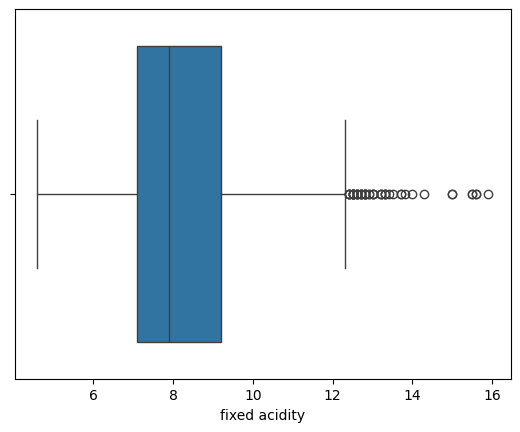

In [ ]:
sns.boxplot(x="fixed acidity", data = df)

<Axes: xlabel='fixed acidity', ylabel='Count'>

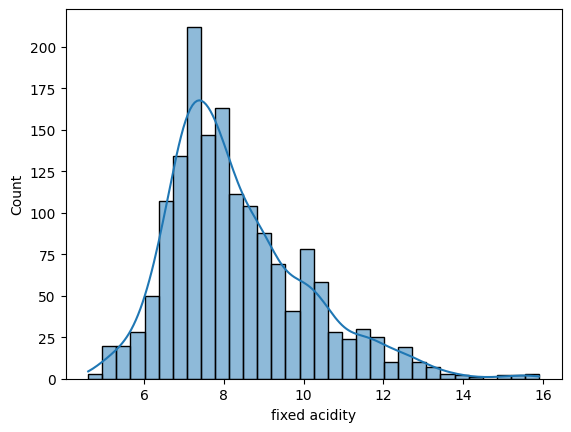

In [ ]:
sns.histplot(x="fixed acidity",data = df, kde = True)

In [ ]:
def replace_outliers(dataframe,feature):
    Q1=dataframe[feature].quantile(0.25)
    Q3=dataframe[feature].quantile(0.75)

    IQR=Q3-Q1

    upper_bound=Q3+1.5*IQR
    lower_bound=Q1-1.5*IQR

    # capping-replacing all higher values with upper bound (75% percentile)
    dataframe[feature]=np.where(dataframe[feature]>upper_bound,upper_bound,dataframe[feature])
    # flooring -replace all lower values with lower bounf (25% percentile)
    dataframe[feature]=np.where(dataframe[feature]<lower_bound,lower_bound,dataframe[feature])

In [ ]:
replace_outliers(df,"fixed acidity")

<Axes: xlabel='fixed acidity'>

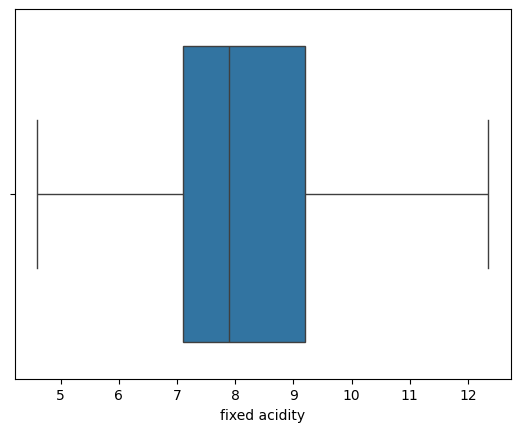

In [ ]:
sns.boxplot(x = "fixed acidity", data = df)

<Axes: xlabel='volatile acidity'>

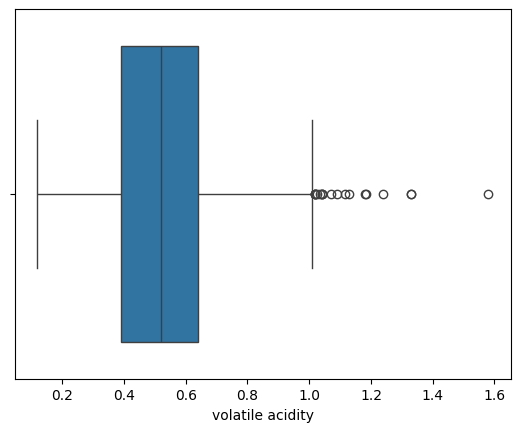

In [ ]:
sns.boxplot(x ="volatile acidity", data =df)

<Axes: xlabel='volatile acidity', ylabel='Count'>

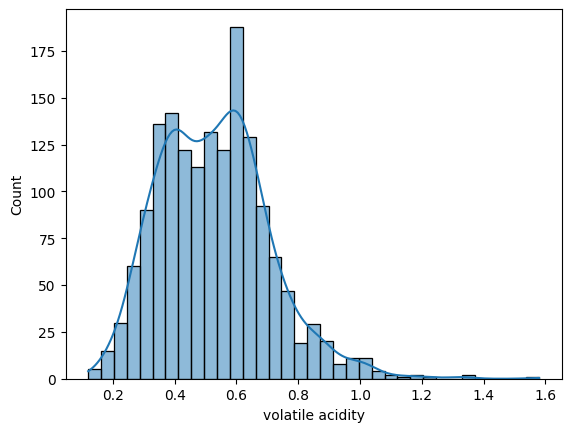

In [ ]:
sns.histplot(x="volatile acidity", data = df, kde =True)

In [ ]:
replace_outliers(df,"volatile acidity")

<Axes: xlabel='volatile acidity'>

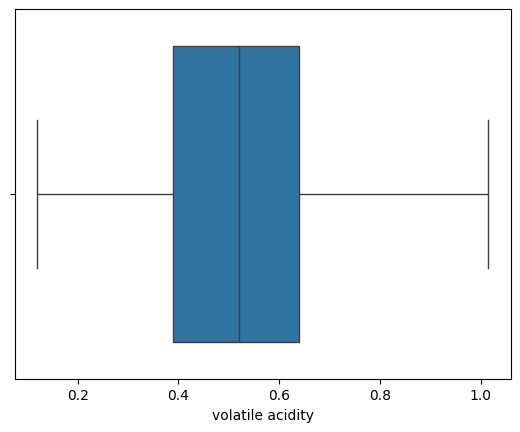

In [ ]:
sns.boxplot(x ="volatile acidity", data = df)

<Axes: xlabel='citric acid'>

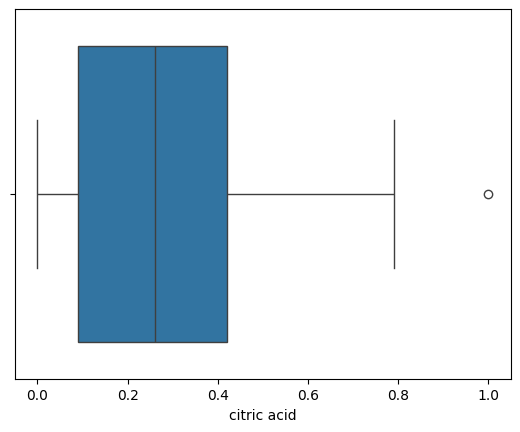

In [ ]:
sns.boxplot(x = "citric acid", data = df)

<Axes: xlabel='citric acid', ylabel='Count'>

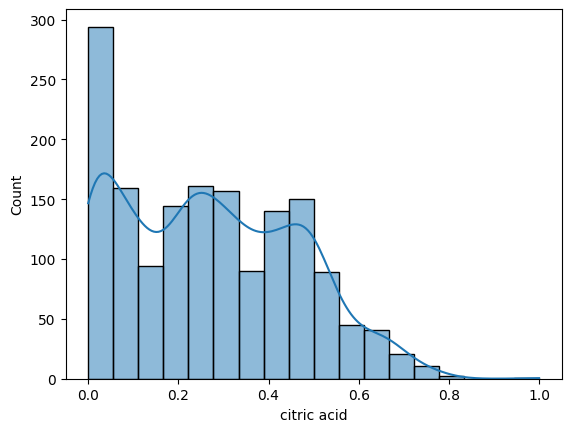

In [ ]:
sns.histplot(x="citric acid",data=df,kde = True)

In [ ]:
replace_outliers(df,"citric acid")

<Axes: xlabel='citric acid'>

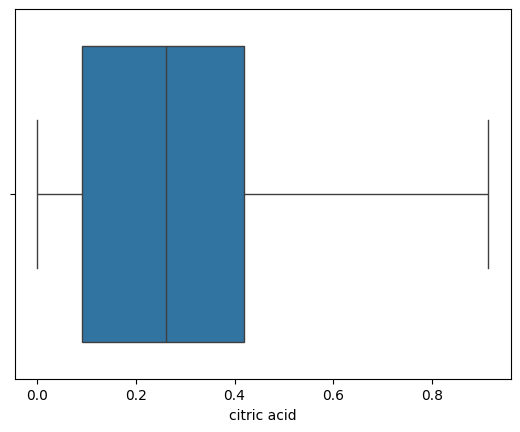

In [ ]:
sns.boxplot(x = "citric acid", data = df)

<Axes: xlabel='residual sugar'>

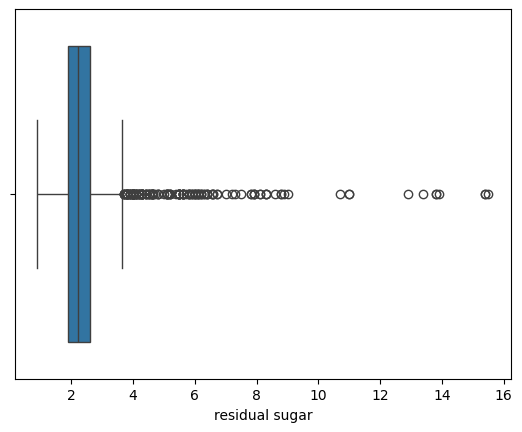

In [ ]:
sns.boxplot(x="residual sugar", data =df)

<Axes: xlabel='residual sugar', ylabel='Count'>

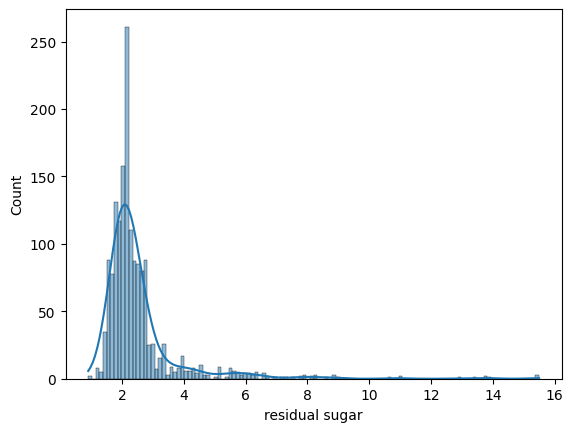

In [ ]:
sns.histplot(x="residual sugar", data = df, kde= True)

In [ ]:
replace_outliers(df,"residual sugar")

<Axes: xlabel='residual sugar'>

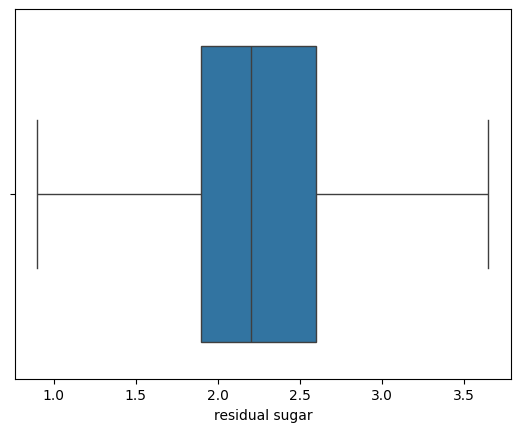

In [ ]:
sns.boxplot(x = "residual sugar", data = df)

<Axes: xlabel='chlorides'>

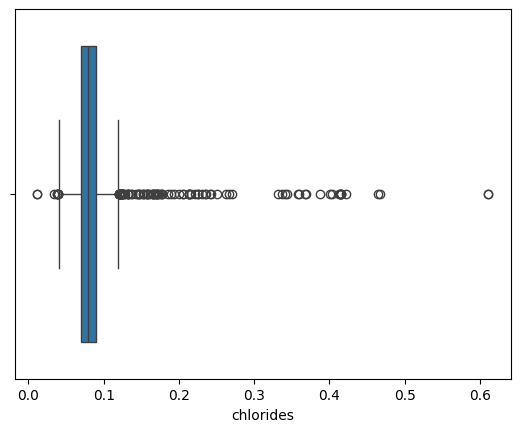

In [ ]:
sns.boxplot(x = "chlorides", data = df)

<Axes: xlabel='chlorides', ylabel='Count'>

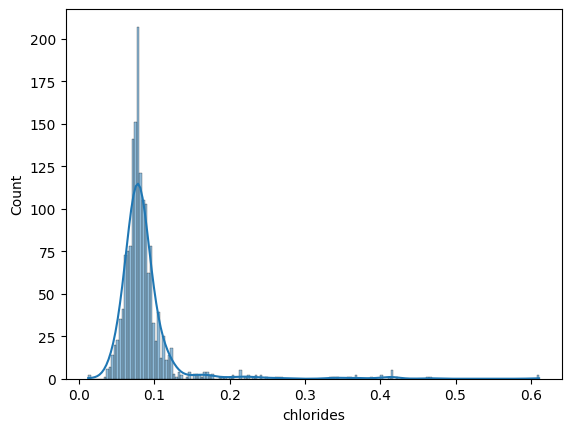

In [ ]:
sns.histplot(x = "chlorides", data =df, kde = True )

In [ ]:
replace_outliers(df, "chlorides")

<Axes: xlabel='chlorides'>

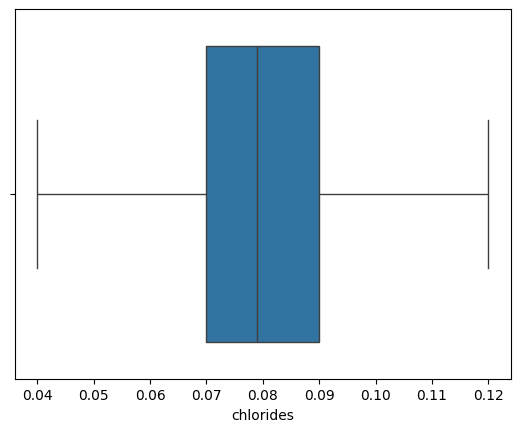

In [ ]:
sns.boxplot(x = "chlorides", data = df)

<Axes: xlabel='free sulfur dioxide'>

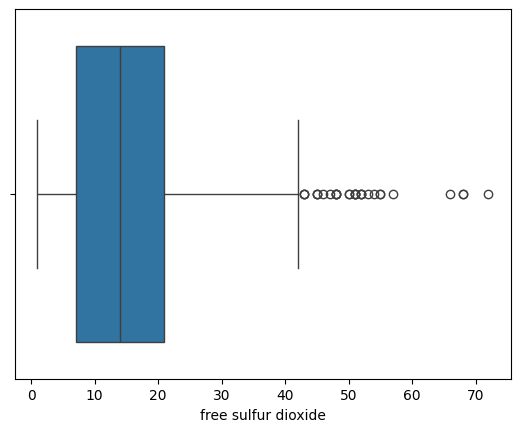

In [ ]:
sns.boxplot(x= "free sulfur dioxide", data = df)

<Axes: xlabel='free sulfur dioxide', ylabel='Count'>

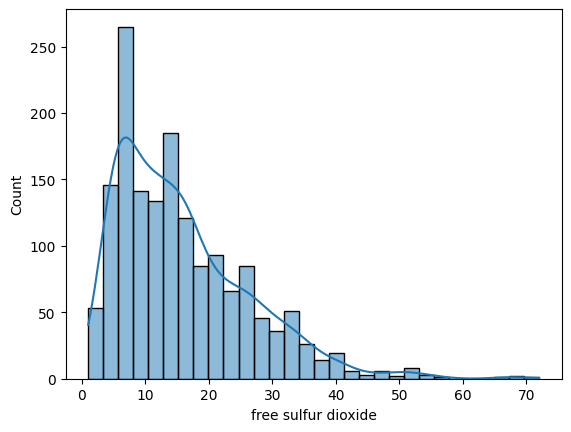

In [ ]:
sns.histplot(x = "free sulfur dioxide", data = df, kde = True )

In [ ]:
replace_outliers(df, "free sulfur dioxide")

<Axes: xlabel='free sulfur dioxide'>

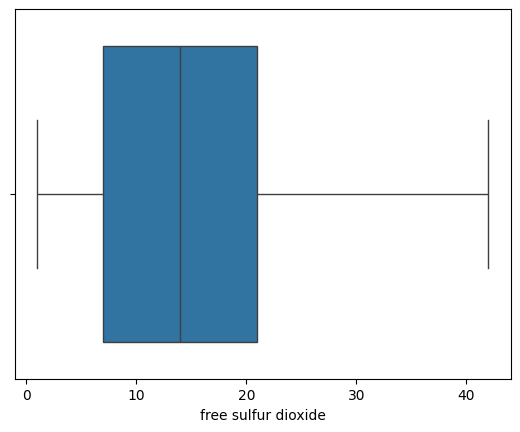

In [ ]:
sns.boxplot(x = "free sulfur dioxide", data = df)

<Axes: xlabel='total sulfur dioxide'>

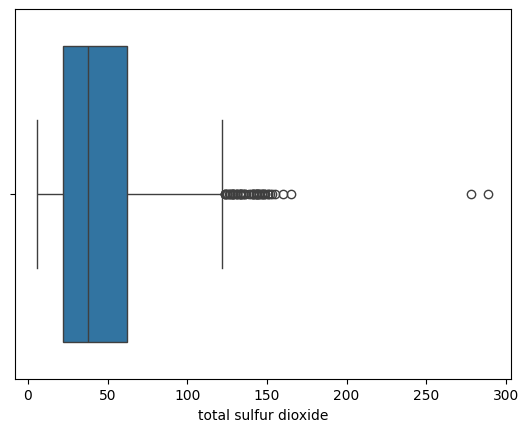

In [ ]:
sns.boxplot(x = "total sulfur dioxide", data = df)

<Axes: xlabel='total sulfur dioxide', ylabel='Count'>

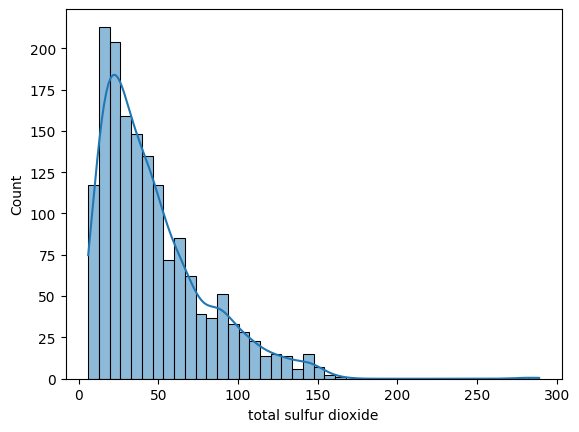

In [ ]:
sns.histplot(x = "total sulfur dioxide", data = df, kde = True)

In [ ]:
replace_outliers(df, "total sulfur dioxide")

<Axes: xlabel='total sulfur dioxide'>

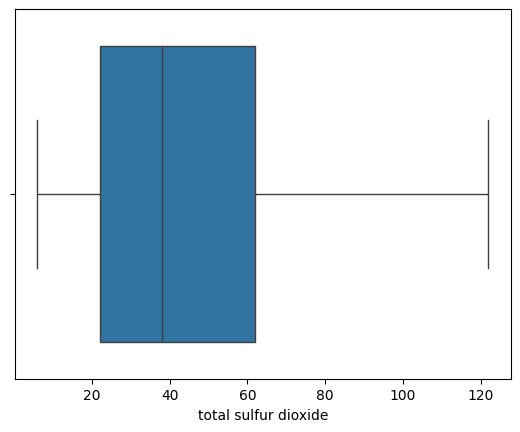

In [ ]:
sns.boxplot(x = "total sulfur dioxide", data = df)

<Axes: xlabel='density'>

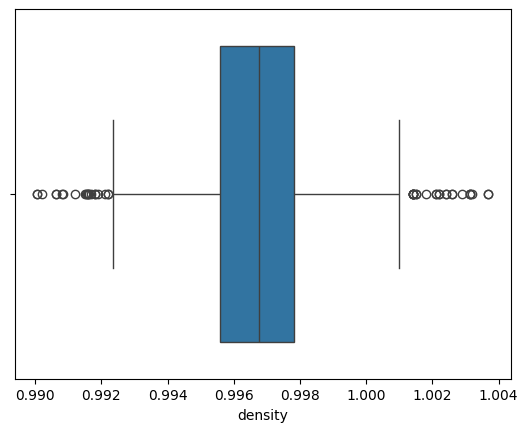

In [ ]:
sns.boxplot(x ="density", data = df)

<Axes: xlabel='density', ylabel='Count'>

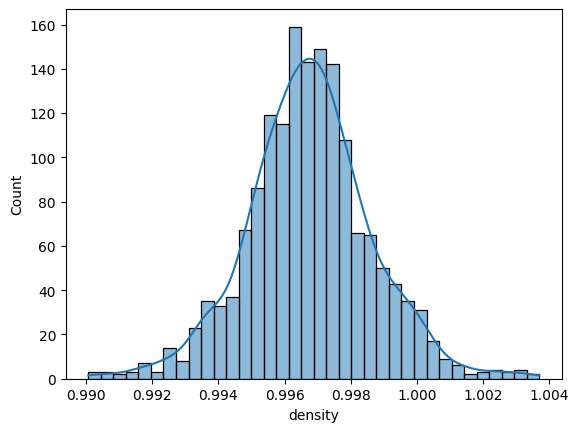

In [ ]:
sns.histplot(x = "density", data = df, kde = "True")

In [ ]:
replace_outliers(df, "density")

<Axes: xlabel='density'>

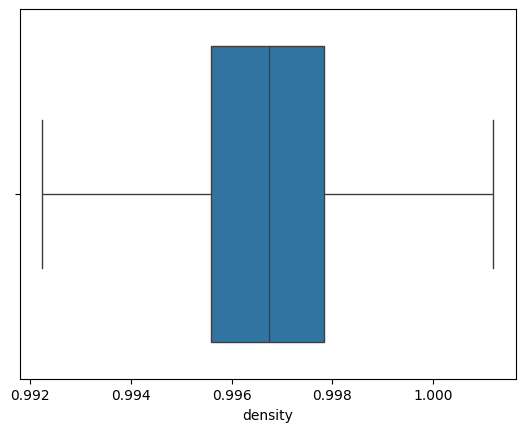

In [ ]:
sns.boxplot(x = "density" , data = df)

<Axes: xlabel='pH'>

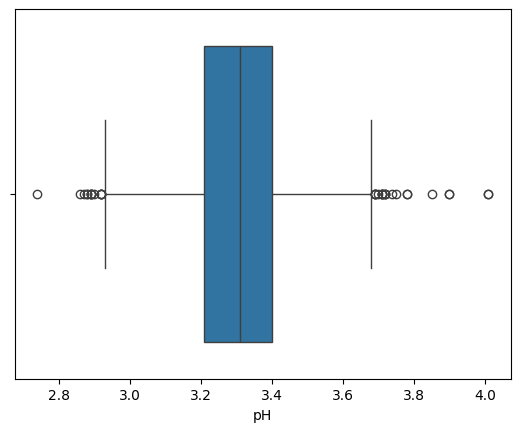

In [ ]:
sns.boxplot( x = "pH", data = df)

<Axes: xlabel='pH', ylabel='Count'>

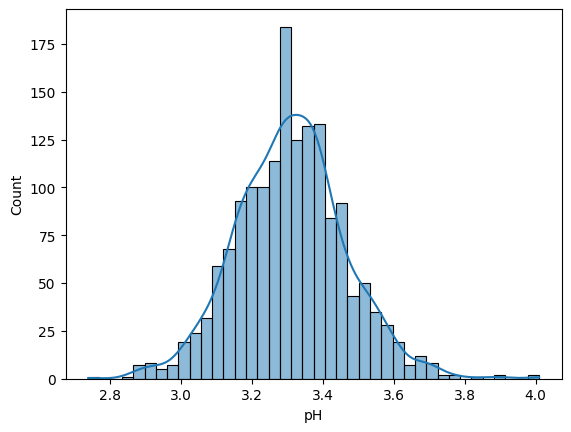

In [ ]:
sns.histplot (x = "pH", data = df, kde = True)

In [ ]:
replace_outliers(df, "pH")

<Axes: xlabel='pH'>

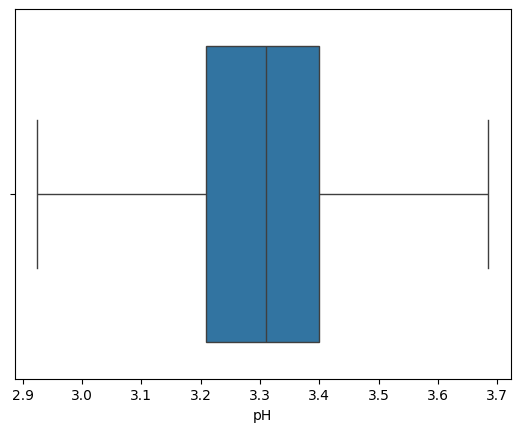

In [ ]:
sns.boxplot(x = "pH", data = df)

<Axes: xlabel='sulphates'>

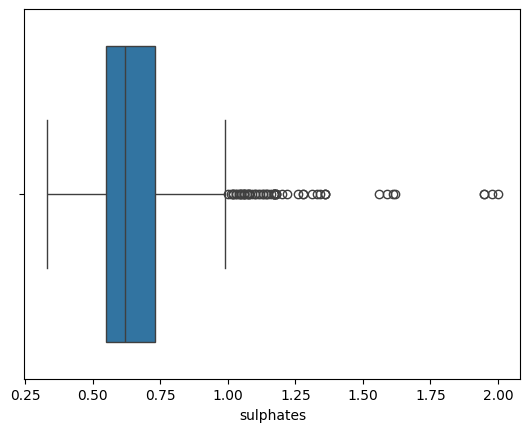

In [ ]:
sns.boxplot(x = "sulphates", data = df )

<Axes: xlabel='sulphates', ylabel='Count'>

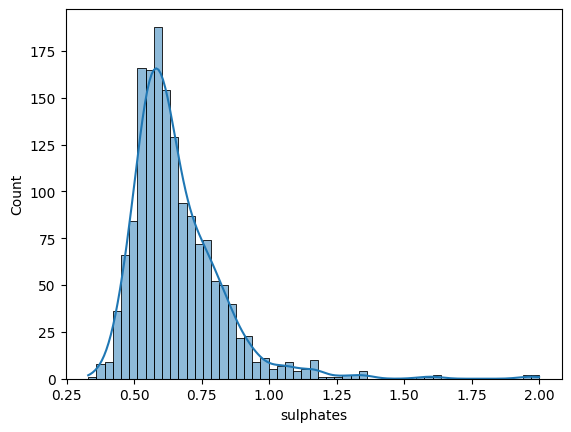

In [ ]:
sns.histplot(x = "sulphates", data = df, kde = True)

In [ ]:
replace_outliers(df, "sulphates")

<Axes: xlabel='sulphates'>

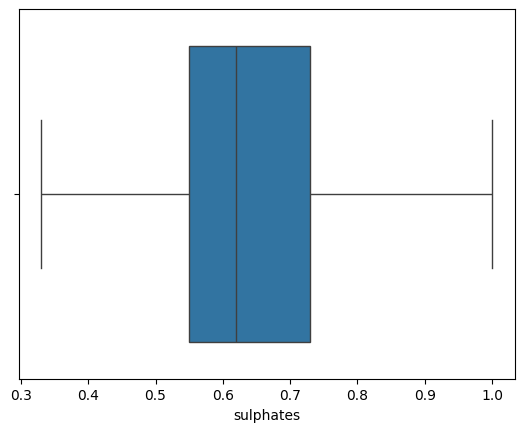

In [ ]:
sns.boxplot (x = "sulphates", data = df)

<Axes: xlabel='alcohol'>

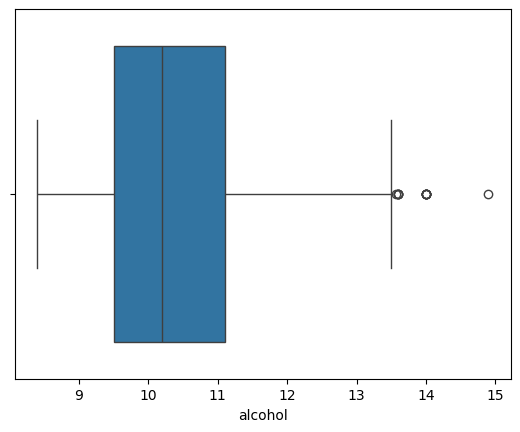

In [ ]:
sns.boxplot(x = "alcohol", data = df)

<Axes: xlabel='alcohol', ylabel='Count'>

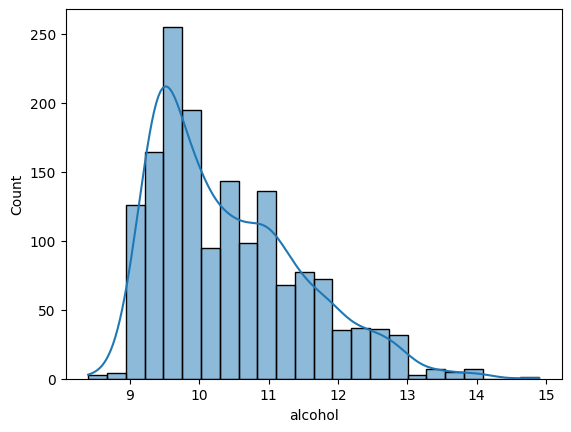

In [ ]:
sns.histplot(x = "alcohol", data = df, kde = True )

In [ ]:
replace_outliers(df, "alcohol")

<Axes: xlabel='alcohol'>

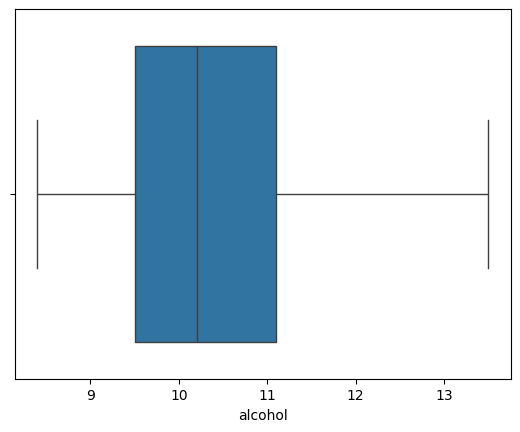

In [ ]:
sns.boxplot(x = "alcohol", data = df)

#**Feature Selection**

In [ ]:
print(df[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide"]].nunique())
print(df[["total sulfur dioxide","density","sulphates","alcohol","quality"]].nunique())

fixed acidity           78
volatile acidity       131
citric acid             80
residual sugar          39
chlorides               81
free sulfur dioxide     45
dtype: int64
total sulfur dioxide    114
density                 411
sulphates                63
alcohol                  61
quality                   6
dtype: int64


In [ ]:
print(df.quality.value_counts())

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


In [ ]:
set(df.quality)

{3, 4, 5, 6, 7, 8}

In [ ]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
Y = df['goodquality']

In [ ]:
# See proportion of good vs bad wines
df['goodquality'].value_counts()

,count
goodquality,
0,1382
1,217


In [ ]:
# 1st feature selection (fixed acidity vs good quality ) (numerical feature vs categorical feature[2 classification only])
                                                  #  T-test  #
import scipy.stats as stats

quality_good=df[df["goodquality"] == "1"]["fixed acidity"]
quality_bad =df[df["goodquality"]== "0"]["fixed acidity"]

t_stat, p_value = stats.ttest_ind(quality_good, quality_bad)

print(f"t-statistic: {t_stat}")
print(f"p-value:  {p_value}")

if p_value <0.05:
    print("Reject the null hypothesis and (feature have bad relationship)")
else:
    print("Fail to reject null hypothesis and (features have good relationship)")

t-statistic: nan
p-value:  nan
Fail to reject null hypothesis and (features have good relationship)


/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [ ]:
# 2nd feature selection (fixed acidity vs good quality ) (numerical feature vs categorical feature[2 classification only])
                                                  #  T-test  #
import scipy.stats as stats

quality_good=df[df["goodquality"] == "1"]["fixed acidity"]
quality_bad =df[df["goodquality"]== "0"]["fixed acidity"]

t_stat, p_value = stats.ttest_ind(quality_good, quality_bad)

print(f"t-statistic: {t_stat}")
print(f"p-value:  {p_value}")

if p_value <0.05:
    print("Reject the null hypothesis: Conditions are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

t-statistic: nan
p-value:  nan
Fail to reject the null hypothesis: No significant difference.


In [ ]:
# 3rd feature selection (volatile acidity vs good quality ) (numerical feature vs categorical feature[2 classification only])
                                              #  T-test  #
import scipy.stats as stats

quality_good = df[df['goodquality'] == '1']['volatile acidity']
quality_bad = df[df['goodquality'] == '0']['volatile acidity']

t_stat, p_value = stats.ttest_ind(quality_good, quality_bad)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Conditions are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant difference.


In [ ]:
# 4th feature selection (residual sugar vs good quality ) (numerical feature vs categorical feature[2 classification only])
                                                  #  T-test  #
import scipy.stats as stats

quality_good = df[df['goodquality'] == '1']['residual sugar']
quality_bad = df[df['goodquality'] == '0']['residual sugar']

t_stat, p_value = stats.ttest_ind(quality_good, quality_bad)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Conditions are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant difference.


In [ ]:
# 5th feature selection (citric acid vs good quality ) (numerical feature vs categorical feature[2 classification only])
                                                       #  T-test  #
import scipy.stats as stats

quality_good = df[df['goodquality'] == '1']['citric acid']
quality_bad = df[df['goodquality'] == '0']['citric acid']

t_stat, p_value = stats.ttest_ind(quality_good, quality_bad)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Conditions are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant difference.


In [ ]:
# 6th feature selection (chlorides vs good quality ) (numerical feature vs categorical feature[2 classification only])
                                            #  T-test  #
import scipy.stats as stats

quality_good = df[df['goodquality'] == '1']['chlorides']
quality_bad = df[df['goodquality'] == '0']['chlorides']

t_stat, p_value = stats.ttest_ind(quality_good, quality_bad)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Conditions are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant difference.


In [ ]:
# 7th feature selection (free sulfur dioxide vs good quality ) (numerical feature vs categorical feature[2 classification only])
                                                        #  T-test  #
import scipy.stats as stats

quality_good = df[df['goodquality'] == '1']['free sulfur dioxide']
quality_bad = df[df['goodquality'] == '0']['free sulfur dioxide']

t_stat, p_value = stats.ttest_ind(quality_good, quality_bad)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Conditions are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant difference.


In [ ]:
# 8th feature selection (total sulfur dioxide vs good quality ) (numerical feature vs categorical feature[2 classification only])
                                                          #  T-test  #
import scipy.stats as stats

quality_good = df[df['goodquality'] == '1']['total sulfur dioxide']
quality_bad = df[df['goodquality'] == '0']['total sulfur dioxide']

t_stat, p_value = stats.ttest_ind(quality_good, quality_bad)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Conditions are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant difference.


In [ ]:
# 9th feature selection (density vs good quality ) (numerical feature vs categorical feature[2 classification only])
                                              #  T-test  #
import scipy.stats as stats

quality_good = df[df['goodquality'] == '1']['density']
quality_bad = df[df['goodquality'] == '0']['density']

t_stat, p_value = stats.ttest_ind(quality_good, quality_bad)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Conditions are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant difference.


In [ ]:
# 10th feature selection (pH vs good quality ) (numerical feature vs categorical feature[2 classification only])
                                            #  T-test  #
import scipy.stats as stats

quality_good = df[df['goodquality'] == '1']['pH']
quality_bad = df[df['goodquality'] == '0']['pH']

t_stat, p_value = stats.ttest_ind(quality_good, quality_bad)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Conditions are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant difference.


In [ ]:
# 11th feature selection (sulphates vs good quality) (numerical feature vs categorical feature[2 classification only])
                                              #  T-test  #
import scipy.stats as stats

quality_good = df[df['goodquality'] == '1']['sulphates']
quality_bad = df[df['goodquality'] == '0']['sulphates']

t_stat, p_value = stats.ttest_ind(quality_good, quality_bad)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Conditions are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant difference.


In [ ]:
# 12th feature selection (alcohol vs good quality) (numerical feature vs categorical feature[2 classification only])
                                          #  T-test  #

quality_good = df[df['goodquality'] == '1']['alcohol']
quality_bad = df[df['goodquality'] == '0']['alcohol']

t_stat, p_value = stats.ttest_ind(quality_good, quality_bad)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Conditions are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant difference.


#**Encoding**

#**Spliting Data**

In [ ]:
# split the wine data set for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scal=scaler.fit_transform(X_train)
X_test_scal=scaler.transform(X_test)

#**Model Selection and Model Building**

#**Using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.859375


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#**Using KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.859375


#**Using SVM**

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
pred_y = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,pred_y))

Accuracy Score: 0.853125


#**Using Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.878125


#**Using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.89375


#**Using Xgboost**

In [ ]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, Y_train)
y_pred5 = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))

Accuracy Score: 0.89375


In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'Random Forest','Xgboost'],
    'Score': [0.859,0.859,0.853,0.878,0.893,0.893]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.893,Random Forest
0.893,Xgboost
0.878,Decision Tree
0.859,Logistic Regression
0.859,KNN
0.853,SVC


In [ ]:
# Hence I will use Random Forest or Xgboost algorithms for training my model.